In [1]:
# pip install tensorflow

### Data Collection. 
The dataset includes detailed information on resale transactions of HDB flats between January 1, 2017, and March 30, 2024. The dataset contains 180,154 rows and 11 columns and was downloaded on May 23, 2024. 

**Dataset URL**: [HDB Resale Prices](https://beta.data.gov.sg/datasets/d_8b84c4ee58e3cfc0ece0d773c8ca6abc/view) 
**HDB RPI URL**:[HDB Resale Prices Index](https://www.hdb.gov.sg/residential/selling-a-flat/overview/resale-statistics)

## NOTE 1

Here, the dataset of HDB Resale Prices is imported.
then it was adjusted by HDB RPI(Resale Price index), so resale prices are comparable across different years , not affect by inflation and other economic conditions.
Finally , the adjusted data is visualzed and went into the prepocess_data and come out clean.

(180154, 11) (175672, 15) (175672, 52)


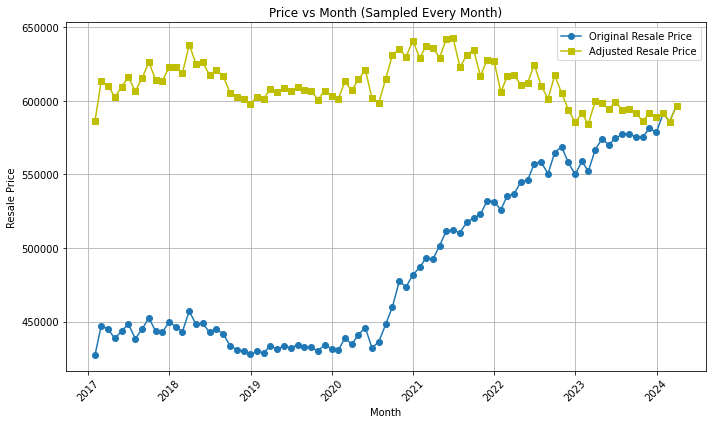

In [2]:
import pandas as pd
import data_config as cfg

df_raw = pd.read_csv('./data/SGHDB2017-2024.csv')
cfg.save_dataset_info(df_raw, fname='dataset_info.csv')## save data set info

df = cfg.adjust_resale_price(df_raw, cut_off_date='2024-04-01')## adjust resale price by using RPI.
cfg.visualize_adjusted_price(df[['month', 'resale_price', 'adjusted_price']].copy(), fname='adjusted_price.png')

df_clean = cfg.preprocess_data(df)
print(df_raw.shape, df.shape, df_clean.shape)
df_clean.to_csv('./data/SGHDB2017-2024_clean.csv', index=False)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180154 entries, 0 to 180153
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                180154 non-null  datetime64[ns]
 1   town                 180154 non-null  object        
 2   flat_type            180154 non-null  object        
 3   block                180154 non-null  object        
 4   street_name          180154 non-null  object        
 5   storey_range         180154 non-null  object        
 6   floor_area_sqm       180154 non-null  float64       
 7   flat_model           180154 non-null  object        
 8   lease_commence_date  180154 non-null  int64         
 9   remaining_lease      180154 non-null  object        
 10  resale_price         180154 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 15.1+ MB


In [4]:
df_raw.head(5)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [5]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,index,adjusted_price,floor,remaining_lease_months
0,2017-01-01,ANG MO KIO,1,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,133.9,318285.287528,11.0,736
1,2017-01-01,ANG MO KIO,2,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,133.9,342979.835698,2.0,727
2,2017-01-01,ANG MO KIO,2,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,133.9,359442.867812,2.0,749
3,2017-01-01,ANG MO KIO,2,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,133.9,363558.625840,5.0,745
4,2017-01-01,ANG MO KIO,2,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,133.9,363558.625840,2.0,749


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175672 entries, 0 to 175671
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   month                   175672 non-null  datetime64[ns]
 1   town                    175672 non-null  object        
 2   flat_type               175672 non-null  int8          
 3   block                   175672 non-null  object        
 4   street_name             175672 non-null  object        
 5   storey_range            175672 non-null  object        
 6   floor_area_sqm          175672 non-null  float64       
 7   flat_model              175672 non-null  object        
 8   lease_commence_date     175672 non-null  int64         
 9   remaining_lease         175672 non-null  object        
 10  resale_price            175672 non-null  float64       
 11  index                   175672 non-null  float64       
 12  adjusted_price          175672

In [7]:
df.describe()

,month,flat_type,floor_area_sqm,lease_commence_date,resale_price,index,adjusted_price,floor,remaining_lease_months
count,175672,175672.000000,175672.000000,175672.000000,1.756720e+05,175672.000000,1.756720e+05,175672.000000,175672.000000
mean,2020-10-20 17:48:43.247871232,3.127772,97.220087,1995.954352,4.949013e+05,148.864986,6.115638e+05,8.763286,828.058507
min,2017-01-01 00:00:00,0.000000,31.000000,1966.000000,1.400000e+05,130.800000,1.527439e+05,2.000000,42.000000
25%,2019-02-01 00:00:00,2.000000,82.000000,1985.000000,3.690000e+05,131.700000,4.682966e+05,5.000000,730.000000
50%,2021-01-01 00:00:00,3.000000,93.000000,1996.000000,4.650000e+05,142.200000,5.762061e+05,8.000000,866.000000
75%,2022-07-01 00:00:00,4.000000,112.000000,2010.000000,5.900000e+05,168.100000,7.149928e+05,11.000000,1022.000000
max,2024-03-01 00:00:00,6.000000,249.000000,2022.000000,1.568888e+06,183.700000,1.725875e+06,50.000000,1173.000000
std,NaN,0.919350,24.028703,13.998510,1.714601e+05,18.744571,2.020093e+05,5.941817,276.154394


Install Required Libraries: 
Ensure you have the necessary libraries installed. You can install them using pip if they are not already installed.
```sgh 
pip install tensorflow pandas scikit-learn
```

### Step 1: 
The project starts by importing the pandas library and loading a cleaned CSV file named {SGHDB2017-2024_clean.csv} into a Pandas DataFrame $df$. Then, the {adjusted_price} column, which represents the housing prices to be predicted, is extracted and stored in the variable $y$ and the remaining columns, which serve as features for the model, are stored in the variable $X$.

In [8]:
# Step 1: Load the data
import pandas as pd
df = pd.read_csv('./data/SGHDB2017-2024_clean.csv')
y = df['adjusted_price'].values   # Target
X = df.drop(columns = 'adjusted_price')  # Features

### Step 2: Prepare the Data:
The dataset is well maintained and prepared by the Singapore government's open data portal. There is no missing data, which simplifies the preprocessing steps. 
Load your dataset and prepare it for training. This includes splitting it into training and testing sets and normalizing the features.

In [9]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Step 2: Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)## TODO : remove  random_state later 

# Standardize continuous features
continuous_columns = ['flat_type', 'floor_area_sqm',  'floor', 'remaining_lease_months'] # isn't flat_type Cat? does it need to scale? yesh it need to be scaled.
binary_columns = df.columns.difference(continuous_columns + ['adjusted_price']).tolist()

scaler = StandardScaler()
X_train_continuous = scaler.fit_transform(X_train[continuous_columns])
X_test_continuous = scaler.transform(X_test[continuous_columns])

# Combine scaled continuous features and binary features
X_train = np.hstack([X_train_continuous, X_train[binary_columns].values])
X_test = np.hstack([X_test_continuous, X_test[binary_columns].values])


### Step 3: 
This step defines a function create_regression_model that constructs a feedforward neural network model for regression using TensorFlow's Keras API. 

In [10]:
import tensorflow as tf

def create_regression_model(input_shape, params={}):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=input_shape),    
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        


        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

2025-06-07 14:48:31.576624: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-07 14:48:31.585228: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749284311.594864 1085426 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749284311.597699 1085426 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-07 14:48:31.607275: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### Step 4: 
The model is trained using the training data  (\(X_{\text{train}}\) and \(y_{\text{train}}\)). The training process runs for 10 epochs (def: \ref{def:epoch}) with a batch size of 32. 

In [11]:
# Step 4: Create and train the model
import time
start_time = time.time()
model = create_regression_model(input_shape=[X_train.shape[1]])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=0)
end_time = time.time()
train_time = end_time - start_time


I0000 00:00:1749284312.865318 1085426 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1854 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1749284313.938215 1085835 service.cc:148] XLA service 0x72b0d8009370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749284313.938238 1085835 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-06-07 14:48:33.952064: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749284314.010310 1085835 cuda_dnn.cc:529] Loaded cuDNN version 90501
I0000 00:00:1749284314.404863 1085835 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


### Step 5:
In the last step, the model is evaluated using various performance metrics and saves the evaluation results to a CSV file.

In [12]:
# Step 4: Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

df_results = pd.DataFrame(columns=['Train', 'Test'])

y_pred = model.predict(X_train)
df_results.loc['Root Mean Squared Error', 'Train'] = np.sqrt(mean_squared_error(y_train, y_pred))
df_results.loc['Mean Aboslute Error', 'Train'] = mean_absolute_error(y_train, y_pred)
df_results.loc['Mean Aboslute Percentage Error', 'Train'] = mean_absolute_percentage_error(y_train, y_pred)*100
df_results.loc['R2 score', 'Train'] = r2_score(y_train, y_pred)

y_pred = model.predict(X_test)
df_results.loc['Root Mean Squared Error', 'Test'] = np.sqrt(mean_squared_error(y_test, y_pred))
df_results.loc['Mean Aboslute Error', 'Test'] = mean_absolute_error(y_test, y_pred)
df_results.loc['Mean Aboslute Percentage Error', 'Test'] = mean_absolute_percentage_error(y_test, y_pred)*100
df_results.loc['R2 score', 'Test'] = r2_score(y_test, y_pred)

df_results = df_results.astype('Float64').round(2)
df_results.to_csv('./data/model_evaluation.csv')
print(df_results)
print(f"total training time :{train_time} seconds")
model.summary()

3843/3843 ━━━━━━━━━━━━━━━━━━━━ 2s 497us/step
1647/1647 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step
                                   Train      Test
Root Mean Squared Error          62942.6  62744.85
Mean Aboslute Error             45435.17  45317.44
Mean Aboslute Percentage Error      7.37      7.36
R2 score                             0.9       0.9
total training time :262.7737147808075 seconds


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629 (25.90 KB)

 Trainable params: 2,209 (8.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,420 (17.27 KB)

In [32]:
import matplotlib.pyplot as plt

def plot_predictions(y_actual, y_predicted):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_predicted, color='blue')
    plt.xlabel('Actual value')
    plt.ylabel('Predicted value')
    plt.title('Predicted vs Actual')
    plt.show()

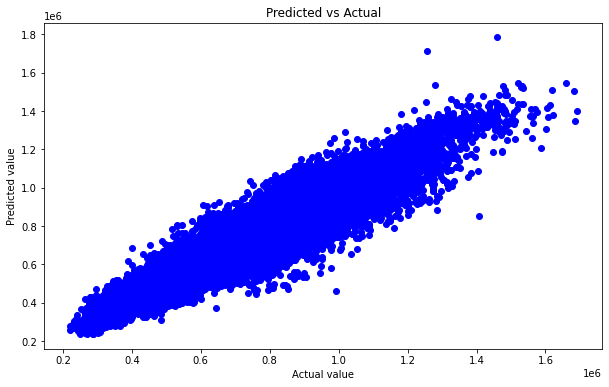

In [33]:
plot_predictions(y_test,y_pred)

I want to compare root mean square error,Mean absolute error,r2 score,etc across different layers,and visualize them. So , I proceeded to use Gemini as assistant and tried to create a different functions
for testing .


With the following code , I can customized layers,neurons,activation function,optimizer,and loss as much as I want. 

In [25]:
def create_regression_modelv_2(input_shape,hidden_layers_neurons=[128,64,32],
                               activation='relu',optimizer='adam',loss='mean_squared_error'):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(shape=input_shape))
    
     
    for neurons in hidden_layers_neurons: 
        model.add(tf.keras.layers.Dense(neurons,activation=activation))
        
    model.add(tf.keras.layers.Dense(1)) #this is output
    model.compile(optimizer=optimizer,loss=loss)
    return model

creating an evaluation function for different model

In [26]:
def train_and_evaluate_model(model,X_train,y_train,X_test,y_test,epochs=10,batch_size=32,verbose=0):
    start_time=time.time()
    history=model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,
                     validation_data=(X_test,y_test),verbose=verbose)
    end_time=time.time()
    train_time=end_time-start_time
    metrics={}
    preds={}
    
    y_pred_train=model.predict(X_train,verbose=0)
    metrics["Root Mean Squared Error (Train)"]=np.sqrt(mean_squared_error(y_train,y_pred_train))
    metrics["Mean Absolute Error (Train)"]=mean_absolute_error(y_train,y_pred_train)
    metrics['Mean Absolute Percentage Error(Train)']= mean_absolute_percentage_error(y_train,y_pred_train)*100
    metrics['R2 Score(Train) ']=r2_score(y_train,y_pred_train)
    preds["y_pred_train"]=y_pred_train
    
    y_pred_test = model.predict(X_test, verbose=0)

    metrics["Root Meean Squared Error(Test)"]=np.sqrt(mean_squared_error(y_test,y_pred_test))
    metrics["Mean absolute Error(Train)"]=mean_absolute_error(y_test,y_pred_test)
    metrics['Mean Absolute Percentage error(Test)']=mean_absolute_percentage_error(y_test,y_pred_test)*100
    metrics["R2 Score(Test)"]=r2_score(y_test,y_pred_test)
    preds["y_pred_test"]=y_pred_test

    return metrics,train_time,history,preds
    

In [46]:
def plot_predictions_v2(ax, y_actual, y_predicted, title='Predicted vs Actual'):
    # Ensure y_predicted is 1D if it comes as (N, 1) from model.predict
    ax.scatter(y_actual, y_predicted.flatten(), alpha=0.7)
    ax.set_xlabel('Actual Value')
    ax.set_ylabel('Predicted Value')
    ax.set_title(title)

    min_val = min(y_actual.min(), y_predicted.min())
    max_val = max(y_actual.max(), y_predicted.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal Fit')
    ax.legend()
    ax.grid(True, linestyle=':', alpha=0.6)

working on ModelA_2layers....
working on ModelB_2layers....
working on ModelC_3layers....
working on ModelD_5layers....
working on ModelF_unO_Random_5layers....
working on ModelG_5layersSN ....
working on ModelE_6layers....
working on ModelH_10Layers....


2025-06-07 17:20:29.968372: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_402', 32 bytes spill stores, 32 bytes spill loads

2025-06-07 17:20:30.226347: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_402', 620 bytes spill stores, 632 bytes spill loads

2025-06-07 17:20:30.295788: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_402', 124 bytes spill stores, 124 bytes spill loads

2025-06-07 17:20:30.397559: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_402', 96 bytes spill stores, 96 bytes spill loads

2025-06-07 17:20:30.491782: I external/local_xla/xla/stream_

2025-06-07 17:22:18.481065: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_402', 212 bytes spill stores, 212 bytes spill loads

2025-06-07 17:22:18.670634: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_416', 88 bytes spill stores, 88 bytes spill loads

2025-06-07 17:22:18.848748: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_430', 152 bytes spill stores, 152 bytes spill loads

2025-06-07 17:22:18.894979: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_831', 16 bytes spill stores, 16 bytes spill loads

2025-06-07 17:22:19.135991: I external/local_xla/xla/stream_

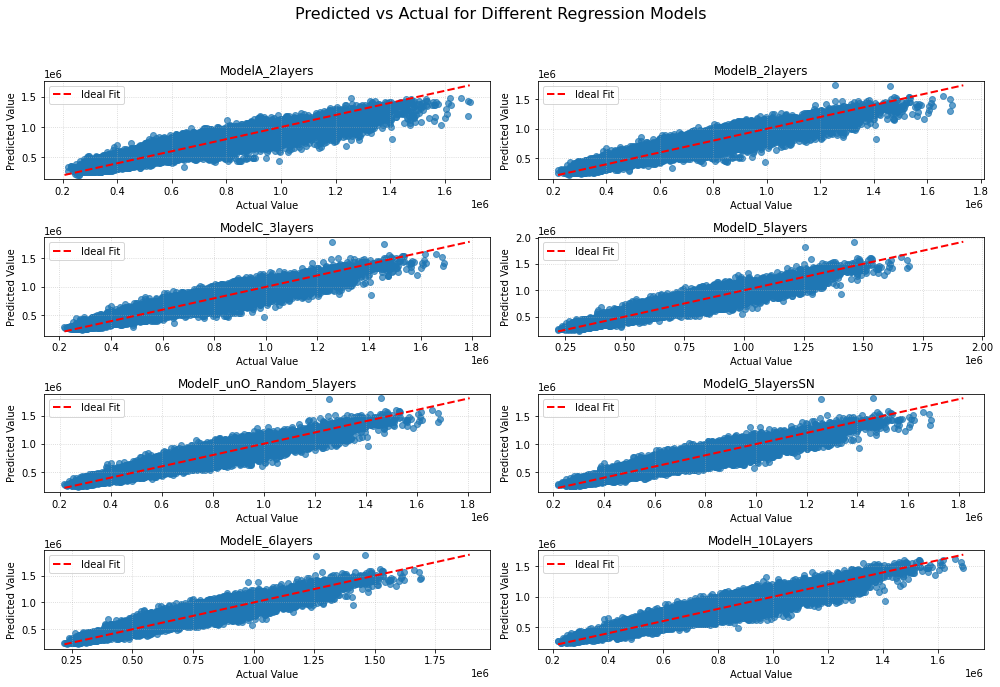

<Figure size 432x288 with 0 Axes>

In [51]:
model_configs={
    "ModelA_2layers":{"hidden_layers_neurons":[128,32]},# 2 layers with 64 dropped greater neurons
    "ModelB_2layers":{"hidden_layers_neurons":[256,128]},# two layers with only big neuron number
    "ModelC_3layers":{"hidden_layers_neurons":[128,64,32]}, # three layers 
    "ModelD_5layers":{"hidden_layers_neurons":[256,128,64,32,16]},# five layers
    
    "ModelF_unO_Random_5layers":{"hidden_layers_neurons":[32,153,12,352,12]},## random neurons and 5 layers with no order
    "ModelG_5layersSN ":{"hidden_layers_neurons":[70,60,50,40,30]},## 5 layers with small neurons with order
    
    "ModelE_6layers":{"hidden_layers_neurons":[512,256,128,64,32,16]},# 6 layers
    "ModelH_10Layers":{"hidden_layers_neurons":[8172,4086,2048,1024,512,256,128,64,32,16]}## testing with 10 layers, 
}
models_results=[]
models_histories={}

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 10))
axes = axes.flatten()
fig.suptitle('Predicted vs Actual for Different Regression Models', fontsize=16)
i=0

for model_name,config in model_configs.items():
    print(f"working on {model_name}....")
    current_model=create_regression_modelv_2(input_shape=[X_train.shape[1]],**config)
#     print(f"Summary {model_name}")
#     current_model.summary
    
    
    metrics,train_time,history,preds=train_and_evaluate_model(
        current_model,X_train,y_train,X_test,y_test,epochs=10,batch_size=32)

    results={"Model":model_name,
        "Training Time":train_time,
        }
    metric={k:v for k,v in metrics.items()}
    results.update(metric)
    
        
    
    results["hidden layers"]=str(config['hidden_layers_neurons'])
    results['Total Params']=current_model.count_params()
    
    models_results.append(results)
    models_histories[model_name]=history
    
    plot_predictions_v2(axes[i], y_test, preds["y_pred_test"],title=model_name)
    i=i+1
    

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()
  

In [53]:
print("-----Model comparison summary----")
df_comparison=pd.DataFrame(models_results)
df_comparison_display=df_comparison.set_index("Model").transpose()
print(df_comparison_display)

excel_file_name = 'model_performance_summary.xlsx'
df_comparison_display.to_excel(excel_file_name, sheet_name='Model Comparison')


-----Model comparison summary----
Model                                 ModelA_2layers ModelB_2layers  \
Training Time                              27.760136      27.698515   
Root Mean Squared Error (Train)         77738.989087   65573.440398   
Mean Absolute Error (Train)              57049.07445   47695.176992   
Mean Absolute Percentage Error(Train)       9.315391        7.76648   
R2 Score(Train)                              0.85189       0.894619   
Root Meean Squared Error(Test)          77708.187842   65411.322605   
Mean absolute Error(Train)              57019.103244   47613.837427   
Mean Absolute Percentage error(Test)        9.330707       7.767906   
R2 Score(Test)                              0.852059       0.895176   
hidden layers                              [128, 32]     [256, 128]   
Total Params                                   10817          46337   

Model                                 ModelC_3layers          ModelD_5layers  \
Training Time                    